In [2]:
%matplotlib inline

import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [3]:
data = pd.read_csv('examples/trip.csv')

In [64]:
print(len(data))
data.head()

146167


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,...,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour,tripduration_mean,male_tripduration_mean,age
212893,231080,7/8/2016 16:22,7/8/2016 16:53,SEA00423,1817.524,E Pine St & 16th Ave,E Pine St & 16th Ave,CH-07,CH-07,Member,...,1931.0,2016-07-08 16:22:00,2016-07-08,2016,7,8,16,1817.524,482.552,85.0
133697,147070,9/20/2015 16:06,9/20/2015 16:15,SEA00067,547.429,Terry Ave & Stewart St,2nd Ave & Pine St,SLU-20,CBD-13,Member,...,1936.0,2015-09-20 16:06:00,2015-09-20,2015,9,20,16,547.429,547.429,79.0
179564,195602,4/3/2016 19:02,4/3/2016 19:03,SEA00308,61.203,Terry Ave & Stewart St,Terry Ave & Stewart St,SLU-20,SLU-20,Member,...,1936.0,2016-04-03 19:02:00,2016-04-03,2016,4,3,19,61.203,61.203,80.0
116828,129239,8/15/2015 17:27,8/15/2015 17:34,SEA00051,406.541,Terry Ave & Stewart St,2nd Ave & Pine St,SLU-20,CBD-13,Member,...,1936.0,2015-08-15 17:27:00,2015-08-15,2015,8,15,17,406.541,406.541,79.0
133730,147105,9/20/2015 17:04,9/20/2015 17:12,SEA00460,475.856,2nd Ave & Pine St,Terry Ave & Stewart St,CBD-13,SLU-20,Member,...,1936.0,2015-09-20 17:04:00,2015-09-20,2015,9,20,17,475.856,475.856,79.0


In [10]:
data = data.sort_values(by='starttime')
data.reset_index()
print('Date range of dataset: %s - %s'%(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime']))

Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


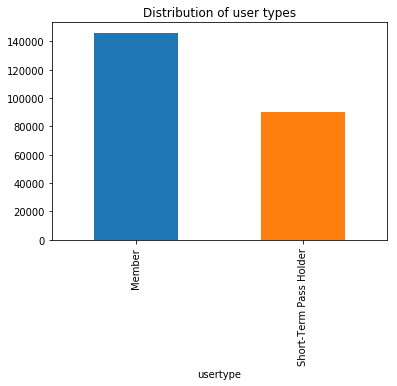

In [6]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')

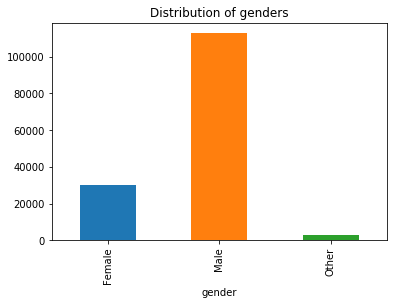

In [7]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

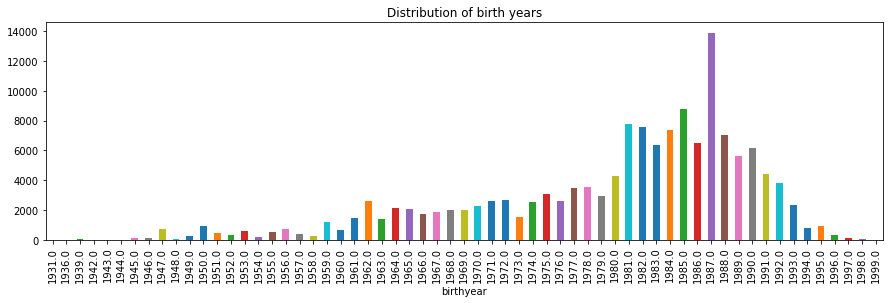

In [11]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15,4))

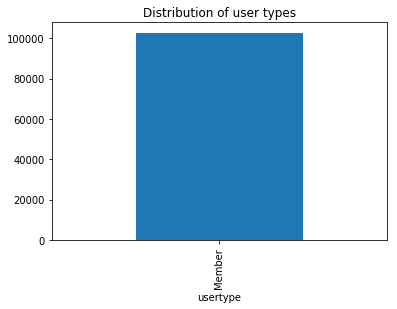

In [12]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

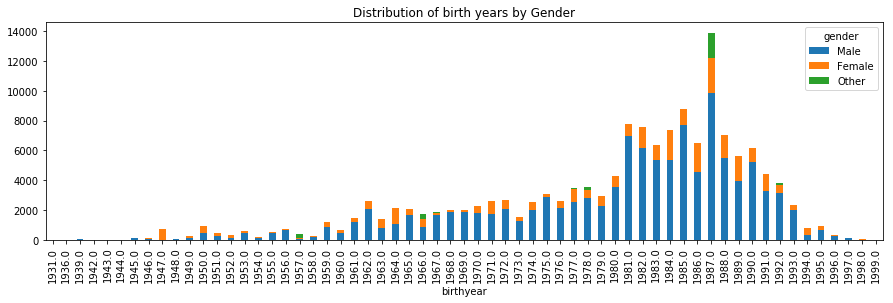

In [13]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender', stacked=True, figsize = (15,4))


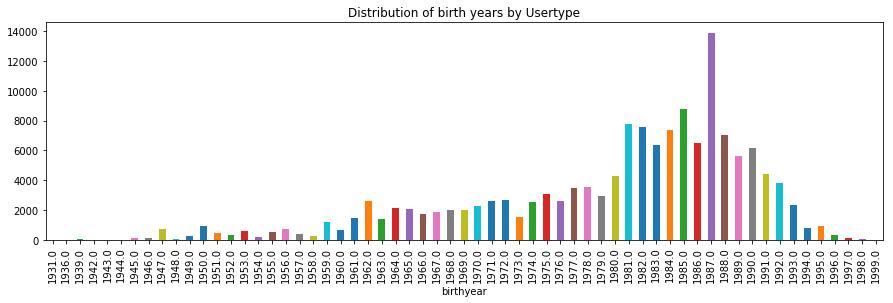

In [14]:
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

In [15]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [16]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [17]:
List_ = list(data['starttime'])

List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

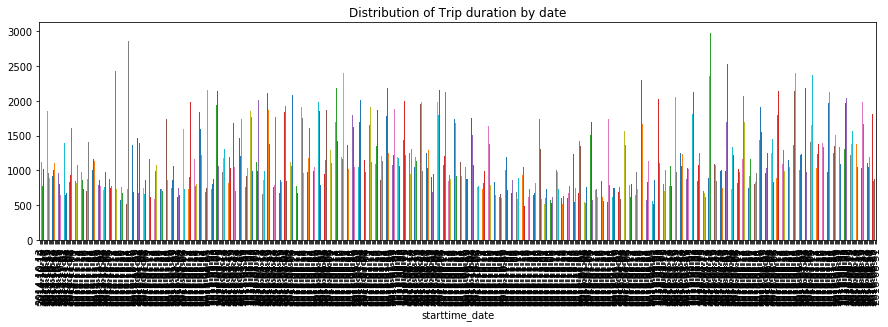

In [18]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 'Distribution of Trip duration by date', figsize = (15,4))

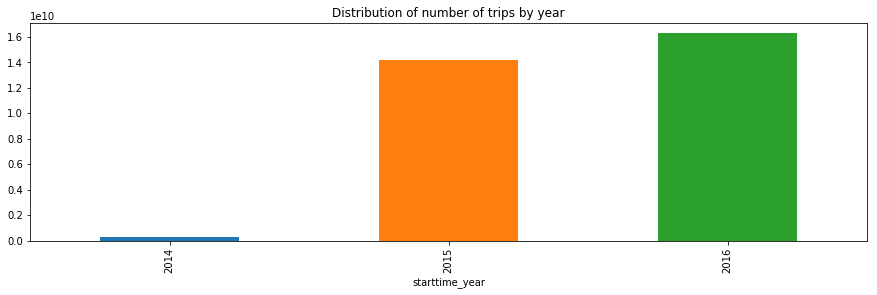

In [25]:
# Excercise 1.  Determine the distribution of number of trips by year.  Do you see a specific pattern?
data.groupby('starttime_year')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by year', figsize = (15,4))

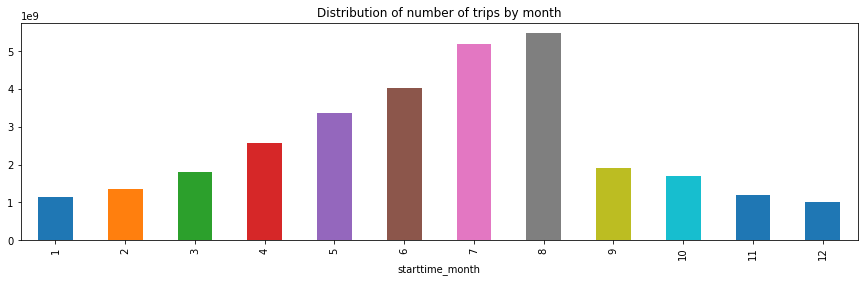

In [26]:
# Excercise 2.  Determine the distribution of number of trips by month.  Do you see a specific pattern?
data.groupby('starttime_month')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by month', figsize = (15,4))

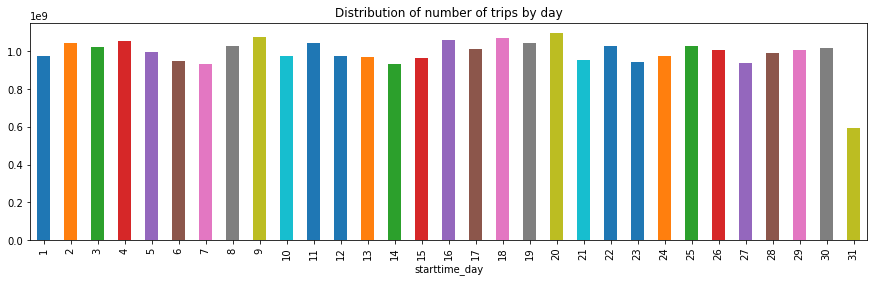

In [27]:
# Excercise 3.  Determine the distribution of number of trips by day.  Do you see a specific pattern?
data.groupby('starttime_day')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by day', figsize = (15,4))

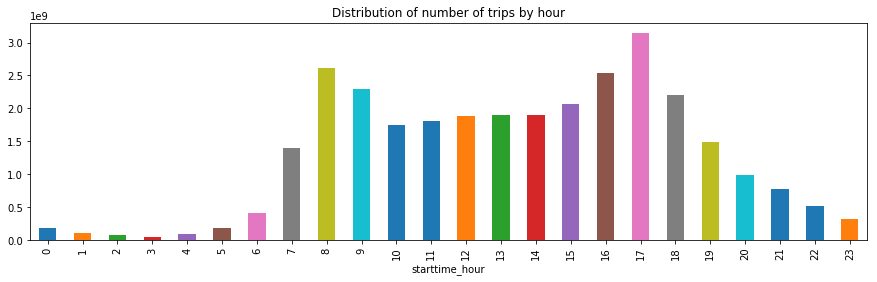

In [29]:
# Excercise 4.  Determine the distribution of number of trips by day.  Do you see a specific pattern?
# I think they meant hour here?
data.groupby('starttime_hour')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by hour', figsize = (15,4))

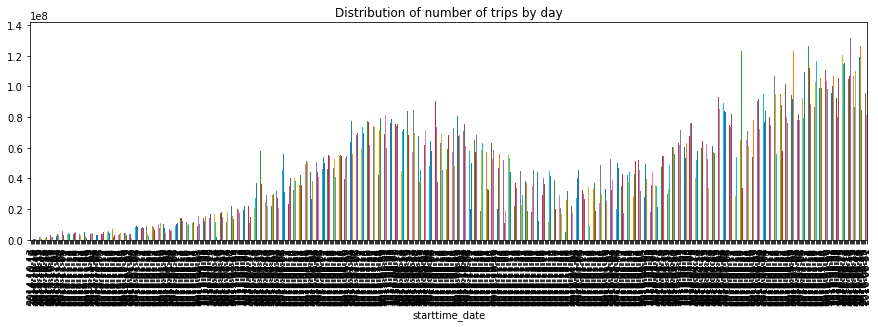

In [30]:
# Excercise 5.  Plot a frequency distribution of trips on a daily basis
data.groupby('starttime_date')['trip_id'].sum().plot.bar(title = 'Distribution of number of trips by day', figsize = (15,4))

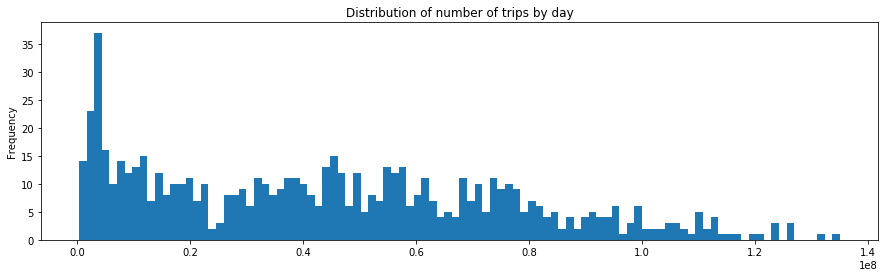

In [32]:
# Excercise 5.  Plot a frequency distribution of trips on a daily basis
data.groupby('starttime_date')['trip_id'].sum().plot.hist(bins=100, title = 'Distribution of number of trips by day', figsize = (15,4))

In [57]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f'%statistics.mean(trip_duration))
print('Median of trip duration: %f'%statistics.median(trip_duration))
print('Mode of station originating from: %s'%statistics.mode(station_from))

Mean of trip duration: 1202.612210
Median of trip duration: 633.235000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


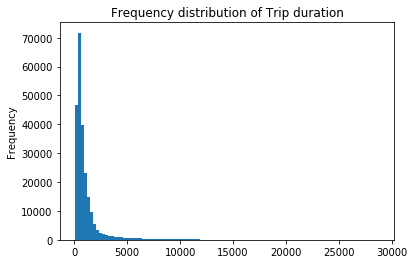

In [34]:
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')
plt.show()

In [35]:
# Notes:
# [Q1 – 1.5 (IQR) ,  Q3 + 1.5 (IQR) ] (i.e. IQR = Q3 - Q1)
# Number of outliers values = Length of all values - Length of all non outliers values
# Ratio of outliers = ( Number of outliers values / Length of all values ) * 100

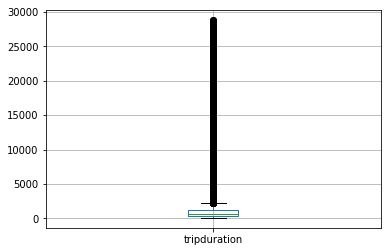

In [36]:
box = data.boxplot(column=['tripduration'])
plt.show()

In [38]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent'%(
    (len(data) - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


In [40]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration: %f'%mean_trip_duration)

Mean of trip duration: 711.726573


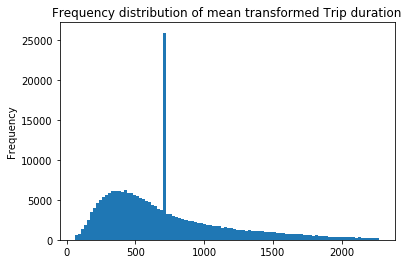

In [41]:
def transform_tripduration(x):
    
    if x > upper_whisker:
        return mean_trip_duration
    return x

data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

In [42]:
print('Mean of trip duration: %f'%data['tripduration_mean'].mean())
print('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print('Median of trip duration: %f'%data['tripduration_mean'].median())

Mean of trip duration: 711.726573
Standard deviation of trip duration: 435.517297
Median of trip duration: 633.235000


In [53]:
# Excercise 1.  Find the mean, median, and mode of the trip duration of gender type male.
male_trip_duration = list(data[data['gender'] == 'Male']['tripduration'])

print('Male Mean of trip duration: %f'%statistics.mean(male_trip_duration))
print('Male Median of trip duration: %f'%statistics.median(male_trip_duration))
print('Male Mode of trip duration: %s'%statistics.mode(male_trip_duration))

Male Mean of trip duration: 563.402797
Male Median of trip duration: 458.451500
Male Mode of trip duration: 466.17400000000004


In [47]:
# Excercise 2. By looking at the numbers obtained earlier, in your opinion is the distribution symmetric or skewed? 
# If skewed, then is it positively skewed or negatively skewed?
# Slightly skewed, positively

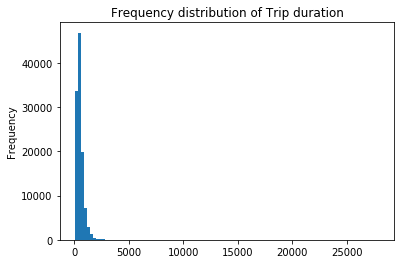

In [55]:
# Excercise 3. Plot a frequency distribution of trip duration for trips availed by gender type male. 
# Does it validate your inference as you did so in the previous question?
data[data['gender'] == 'Male']['tripduration'].plot.hist(bins=100, title='Frequency distribution of Male Trip duration')
plt.show()

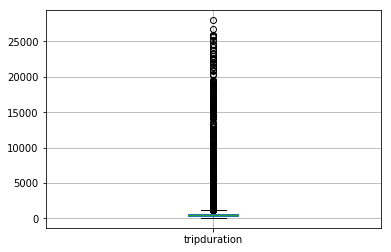

In [56]:
# Excercise 4. Plot a box plot of the trip duration of trips taken by males. Do you think any outliers exist?
box = data[data['gender'] == 'Male'].boxplot(column=['tripduration'])
plt.show()

In [58]:
# Exercise 5. Apply the formula in Listing 1-6 to determine the percentage of observations for which outliers exists.
q75, q25 = np.percentile(male_trip_duration, [75 ,25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent'%(
    (len(male_trip_duration) - len([x for x in male_trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)]))*100/float(len(male_trip_duration))))

Proportion of values as outlier: 5.030104 percent


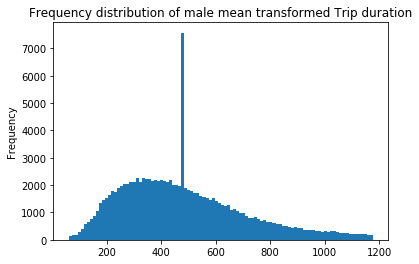

In [59]:
# Exercise 6. Perform the treatment of outliers by incorporating one of the methods we discussed earlier for the treatment of outliers.
male_mean_trip_duration = np.mean([x for x in male_trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
male_upper_whisker = q75+(1.5*iqr)

def male_transform_tripduration(x):
    
    if x > male_upper_whisker:
        return male_mean_trip_duration
    return x

data['male_tripduration_mean'] = data['tripduration'].apply(lambda x: male_transform_tripduration(x))

data[data['gender'] == 'Male']['male_tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of male mean transformed Trip duration')
plt.show()


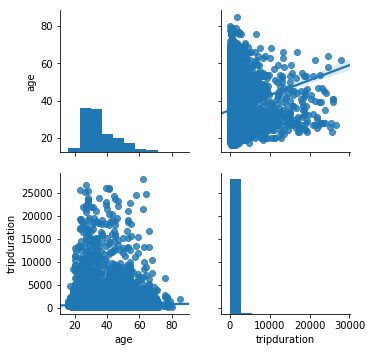

In [65]:
data = data.dropna()
data['age'] = data['starttime_year'] - data['birthyear']
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')
plt.show()

In [61]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


In [73]:
data = pd.read_csv('examples/trip.csv')

List_ = list(data['starttime'])

List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

for cat in ['gender','usertype']:

    print('Category: %s\n'%cat)
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)

    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:

        print('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
        print('\n')

Category: gender

Female Male
Statistic: -38.572176, P value: 0.000000


Female Other
Statistic: 48.248666, P value: 0.000000


Male Other
Statistic: 53.180282, P value: 0.000000


Category: usertype

Member Short-Term Pass Holder
Statistic: 14.393456, P value: 0.000000




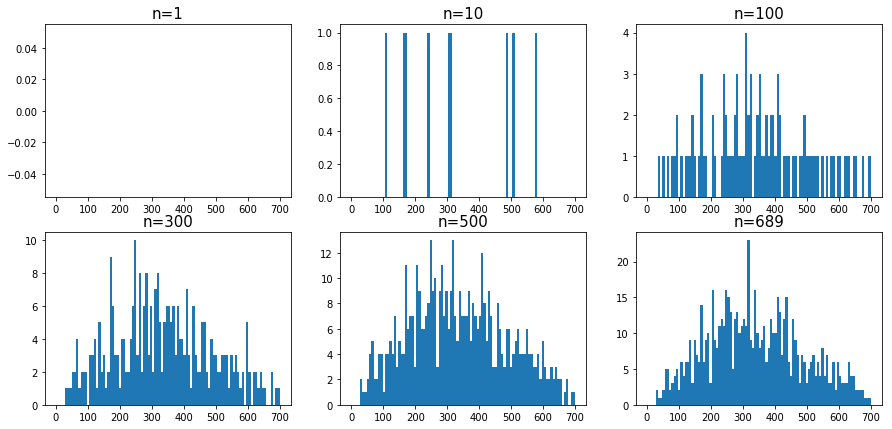

In [76]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1

random.shuffle(daily_tickets)

plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))

for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())

    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2,3,plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1),fontsize=15)        
        plot_count+=1

    if not daily_tickets:
        break
        
plt.show()